# Clasificador de digitos con Tensorflow

Importamos las librerías necesarias:

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

Importamos nuestro **dataset**, obteniendo los conjuntos de datos de entrenamiento (train_images) y de prueba (test_images). train_labels y test_labels contienen la clase a la que pertence cada imagen en el respectivo conjunto de datos.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

Graficamos la primer imagen de entrenamiento, para ver como luce:

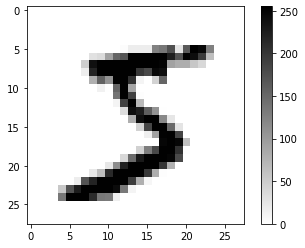

In [ ]:
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

Normalizamos todas las imágenes en el rango [0,1]

In [ ]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images / 255.0
test_images = test_images / 255.0

Mostramos las primeras 25 imágenes:

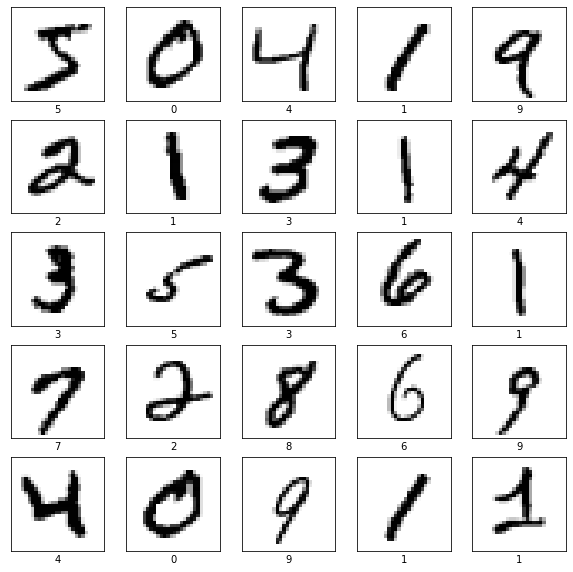

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(train_labels[i])
plt.show()

Construimos el modelo:

In [ ]:
modelo = keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28,1)), # capa de entrada
  keras.layers.Dense(128, activation='relu'), # capa oculta
  keras.layers.Dense(10, activation='softmax') # capa de salida
])

Compilamos el modelo:

In [ ]:
modelo.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
Realizamos el entrenamiento:

In [ ]:
modelo.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2635 - accuracy: 0.9238
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1134 - accuracy: 0.9660
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0780 - accuracy: 0.9767
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0576 - accuracy: 0.9824
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0445 - accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0346 - accuracy: 0.9893
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0276 - accuracy: 0.9914
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0230 - accuracy: 0.9927
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0194 - accuracy: 0.9937
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.015

Evaluamos el modelo obtenido:

In [ ]:
test_loss, test_accuracy = modelo.evaluate(test_images,  test_labels, verbose=2)

print('\nExactitud:', test_accuracy)

313/313 - 1s - loss: 0.0746 - accuracy: 0.9808 - 641ms/epoch - 2ms/step

Exactitud: 0.9807999730110168


Hacemos predicciones sobre todo el conjunto de prueba:

In [ ]:
predicciones = modelo.predict(test_images)
predicciones[0]

array([6.4565051e-09, 1.5323357e-12, 5.4687401e-08, 3.9008270e-07,
       1.8409863e-15, 1.8884714e-09, 1.9970772e-14, 9.9999952e-01,
       3.7506842e-09, 2.2562899e-08], dtype=float32)

Checamos la clase asignada para la primera predicción:

In [ ]:
np.argmax(predicciones[0])

7

Graficamos la primer imagen del conjunto de prueba para verificar si la predicción anterior es correcta:

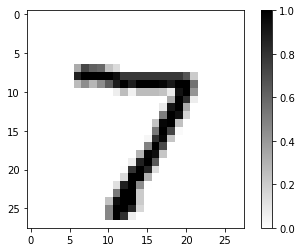

In [ ]:
plt.figure()
plt.imshow(test_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
nuevaImagen = cv2.imread('/content/img1.png')
nuevaImagen = cv2.resize(nuevaImagen,dsize=(28,28),interpolation=cv2.INTER_CUBIC)
nuevaImagen = cv2.cvtColor(nuevaImagen,cv2.COLOR_BGR2GRAY)
npImage = np.asarray(nuevaImagen)
print(npImage.shape)
npImage = np.expand_dims(npImage,axis=0);
npImage = npImage / 255.0
print(npImage.shape)
cv2_imshow(nuevaImagen)

(28, 28)
(1, 28, 28)


In [ ]:
nuevaPrediccion = modelo.predict(npImage)
np.argmax(nuevaPrediccion[0])

2